In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from core.data import load_from_kaggle


c:\Anna-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "yunusemretokdemir/customer-segmentation" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\customer-segmentation' already exists with files. Skipping download (replace=False).


In [3]:
files

['PBL5recommendationdata.csv', 'PBL5recommendationdata_cut.csv']

In [5]:
cols = [
    "Customers.id", "Customers.fname", "Customers.lname", "Customers.company",
    "Customers.create_date", "Customers.mailing", "Customers.last_modified",
    "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname",
    "Orders.company", "Orders.order_number", "Orders.reorder_id",
    "Orders.external_source", "Orders.external_id", "Orders.subtotal",
    "Orders.tax", "Orders.shipping", "Orders.coupon_id", "Orders.coupon_amount",
    "Orders.fee_name", "Orders.fee_amount", "Orders.discount_name",
    "Orders.discount_amount", "Orders.total", "Orders.balance_due",
    "Orders.shipping_carrier", "Orders.shipping_method", "Orders.payment_status",
    "Orders.payment_date", "Orders.payment_user", "Orders.payment_type",
    "Orders.payment_method", "Orders.payment_amount", "Orders.payment_id",
    "Orders.payment_code", "Orders.status", "Orders.placed_date",
    "Orders.updated_date", "Orders.shipped_date", "Orders.comments",
    "Order_Items.id", "Order_Items.parent", "Order_Items.product_id",
    "Order_Items.product_name", "Order_Items.qty", "Order_Items.price",
    "Order_Items.cost", "Order_Items.reorder_frequency",
    "Products.id", "Products.status", "Products.vendor", "Products.import_id",
    "Products.name", "Products.display_name", "Products.list_price",
    "Products.price", "Products.sale_price", "Products.cost",
    "Products.last_modified", "Products.taxable", "Products.shopping_brand",
    "Products.shopping_mpn", "Products.shopping_color",
    "Products.pricegrabber_cat", "Products.shopzilla_cat",
    "Products.thefind_cat", "Products.quickbooks_id",
    "Products.qb_edit_sequence", "Products.short_description", "Products.unit",
    "Products.packaging", "Products.display_packaging", "Products.multiple",
    "Products.latex", "Products.case_qty", "Products.notes",
    "Products.map_price", "Products.shipping_length",
    "Products.shipping_width", "Products.shipping_height",
    "Products.handling_time", "Products.family_id"
]

#df = pd.read_csv("PBL5recommendationdata.csv", usecols=cols)
df = pd.read_csv("/".join(["../data/raw/", dataset_name, 'PBL5recommendationdata.csv']), usecols=cols, encoding="latin1")


C:\Users\Anna\AppData\Local\Temp\ipykernel_15368\3789921674.py:34: DtypeWarning: Columns (20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/".join(["../data/raw/", dataset_name, 'PBL5recommendationdata.csv']), usecols=cols, encoding="latin1")


In [6]:
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")
#df = pd.read_csv("/".join(["../data/raw", dataset_name, "PBL5recommendationdata_cut.csv"]), sep=';')
df.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,...,Products.multiple,Products.latex,Products.case_qty,Products.notes,Products.map_price,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.family_id
0,797,Christy,Dill,Company0,1426018724,NaN,1437764306,3758,797,Christy,...,1 EA,NaN,1.0,NaN,NaN,24.80,7.50,30.40,NaN,PF61071
1,3,John,Smith,Company1,1386089139,NaN,1437764354,23,3,John,...,1 EA,Yes,1.0,OFF sale cause it is an RX item,NaN,8.00,7.00,1.50,NaN,PF02132
2,3,John,Smith,Company1,1386089139,NaN,1437764354,9531,3,John,...,1 CS,NaN,800.0,NaN,NaN,13.23,10.04,10.24,NaN,PF00342
3,4,James,Anderson,NaN,1386780263,NaN,1437762646,29,4,James,...,1 EA,Yes,1.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970
4,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,30,5,Abraham,...,1 EA,NaN,1.0,OFF sale cause it is an RX item,NaN,8.50,2.75,12.00,NaN,PF03045
5,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,226,5,Abe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,1658,5,Abraham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,peggy,thompson,NaN,1388155947,NaN,1437763617,32,7,peggy,...,1 CS,Yes,1920.0,NaN,NaN,13.60,9.20,11.30,NaN,PF01527
8,8,Randy,Pruss,NaN,1389303216,NaN,1437763421,40,8,Randy,...,1 EA,Yes,1.0,NaN,NaN,17.50,16.00,10.00,NaN,PF04706
9,10,Tommy,Smith,NaN,1390509516,NaN,1437763553,70,10,Tommy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Customers.id,4194.0,1.796520e+03,1.065680e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Customers.create_date,4194.0,1.440971e+09,1.887681e+07,1.386089e+09,1.427323e+09,1.446412e+09,1.456955e+09,1.463418e+09
Customers.mailing,2114.0,9.800000e-01,1.400000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Customers.last_modified,4194.0,1.450401e+09,1.021334e+07,1.437559e+09,1.437763e+09,1.456954e+09,1.456956e+09,1.463418e+09
Orders.id,4194.0,9.142980e+03,5.276540e+03,2.300000e+01,4.258000e+03,9.641000e+03,1.401175e+04,1.743700e+04
Orders.customer_id,4194.0,1.796520e+03,1.065680e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Orders.reorder_id,82.0,7.389160e+03,3.818090e+03,3.000000e+01,4.537250e+03,6.887000e+03,1.083200e+04,1.620100e+04
Orders.external_id,5.0,6.018061e+08,1.342831e+09,6.638000e+01,1.698485e+06,1.698485e+06,1.698485e+06,3.003935e+09
Orders.subtotal,4194.0,1.319300e+02,2.311600e+02,2.890000e+00,3.675000e+01,7.474000e+01,1.399600e+02,5.163040e+03
Orders.tax,3737.0,8.000000e-01,4.860000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329300e+02


In [8]:
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date'], unit='s')
df['Customers.last_modified'] = pd.to_datetime(df['Customers.last_modified'], unit='s')
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], unit='s')
df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date'], unit='s')
df['Orders.updated_date'] = pd.to_datetime(df['Orders.updated_date'], unit='s')
df['Orders.shipped_date'] = pd.to_datetime(df['Orders.shipped_date'], unit='s')
df['Products.last_modified'] = pd.to_datetime(df['Products.last_modified'], unit='s')
df['Products.qb_edit_sequence'] = pd.to_datetime(df['Products.qb_edit_sequence'], unit='s')

In [9]:
df["Customers.create_date"] = pd.to_datetime(df["Customers.create_date"]).dt.floor('s')
df["Customers.last_modified"] = pd.to_datetime(df["Customers.last_modified"]).dt.floor('s')
df["Orders.placed_date"] = pd.to_datetime(df["Orders.placed_date"]).dt.round('s')
df["Orders.payment_date"] = pd.to_datetime(df["Orders.payment_date"]).dt.round('s')
df["Orders.updated_date"] = pd.to_datetime(df["Orders.updated_date"]).dt.round('s')
df["Orders.shipped_date"] = pd.to_datetime(df["Orders.shipped_date"]).dt.round('s')
df["Products.last_modified"] = pd.to_datetime(df["Products.last_modified"]).dt.round('s')
df["Products.qb_edit_sequence"] = pd.to_datetime(df["Products.qb_edit_sequence"]).dt.round('s') 


In [10]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 84)

'Description'

,count,mean,min,25%,50%,75%,max,std
Customers.id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.mailing,2114.0,0.98,0.0,1.0,1.0,1.0,1.0,0.14
Customers.last_modified,4194,2015-12-18 01:06:01.111110912,2015-07-22 09:59:40,2015-07-24 18:41:19.249999872,2016-03-02 21:20:24,2016-03-02 21:53:39.750000128,2016-05-16 17:00:49,NaN
Orders.id,4194.0,9142.98,23.0,4258.0,9641.0,14011.75,17437.0,5276.54
Orders.customer_id,4194.0,1796.52,3.0,865.25,1747.5,2698.75,3736.0,1065.68
Orders.reorder_id,82.0,7389.16,30.0,4537.25,6887.0,10832.0,16201.0,3818.09
Orders.external_id,5.0,601806117.48,66.38,1698485.0,1698485.0,1698485.0,3003935066.0,1342831106.3
Orders.subtotal,4194.0,131.93,2.89,36.75,74.74,139.96,5163.04,231.16
Orders.tax,3737.0,0.8,0.0,0.0,0.0,0.0,132.93,4.86


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,int64,0,3054,"[2436, 2889, 3203]"
Customers.fname,object,0,1631,"[Jessica, Carol, yvette]"
Customers.lname,object,0,2557,"[Kline, Wilson, Abdullayev]"
Customers.company,object,3467,425,"[nan, Company421, nan]"
Customers.create_date,datetime64[ns],0,3054,"[2016-03-02 19:16:54, 2016-04-06 06:35:16, 201..."
...,...,...,...,...
Products.shipping_length,float64,196,460,"[9.5, 17.8, 30.0]"
Products.shipping_width,float64,196,392,"[3.75, 7.1, 5.7]"
Products.shipping_height,float64,196,361,"[18.75, nan, 12.46]"
Products.handling_time,object,3196,6,"[nan, nan, nan]"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   int64         
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   int64         
 8   Orders.customer_id             4194 non-null   int64         
 9   Orders.fname                   4194 non-null   object        
 10  Orders.lname                   4194 non-null   object        
 11  Orders.company   

In [12]:

blacklist = ['Orders.external_id', 'Orders.external_source', 'Orders.fee_amount', 'Orders.payment_user', 
            'Orders.payment_id', 'Orders.payment_code', 'Orders.comments', 'Orders.fee_name',  
            'Products.pricegrabber_cat', 'Products.shopzilla_cat', 'Products.thefind_cat', 
            'Products.quickbooks_id', 'Products.qb_edit_sequence','Products.display_packaging',
            'Products.short_description', 'Products.notes', 'Products.multiple',
            'Products.latex', 'Products.map_price'
            ]  # 'Products.packaging'

blacklist2 = ['Orders.lname','Orders.fname']   
blacklist3 = [] 
 
category_list = ['Products.handling_time','Orders.coupon_amount',
                 'Orders.shipping_carrier',  'Orders.payment_type', 'Orders.payment_method', 'Products.status', 
                 'Products.vendor', 'Products.shopping_brand'
                 ] 

In [18]:
#df = df.drop(columns=blacklist)
df = df.drop(columns=blacklist2)

In [15]:
for col in category_list:
    df[col] = df[col].astype("category")

In [17]:
mismatch = df[
    (df["Orders.lname"] != df["Customers.lname"]) |
    (df["Orders.fname"] != df["Customers.fname"])
]

mismatch = mismatch.reset_index(drop=True)

mismatch[[
    "Customers.id", 
    "Customers.fname", "Orders.fname",
    "Customers.lname", "Orders.lname"
]]

,Customers.id,Customers.fname,Orders.fname,Customers.lname,Orders.lname
0,5,Abraham,Abe,Pollak,Pollak
1,100,Arlene,Luis,Maldonado,Moriel.a
2,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
3,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
4,308,James,James,James,Watson
5,453,Herbert M,Matthew,Levy,Levy
6,453,Herbert M,Matthew,Levy,Levy
7,708,Brian,Joshua,Kuester,Olson
8,789,Michael D,Michael,Swedberg,Swedberg
9,904,Margaret,Margaret,Pyler,Tyler


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   int64         
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   int64         
 8   Orders.customer_id             4194 non-null   int64         
 9   Orders.company                 728 non-null    object        
 10  Orders.order_number            4194 non-null   object        
 11  Orders.reorder_id

In [20]:
mismatch = df[(df["Customers.id"] != df["Orders.customer_id"])]
mismatch[["Customers.id"]]

,Customers.id


In [21]:
df["Orders.id"].nunique(), df["Customers.id"].nunique(), 
df.nunique().sort_values()
df.nunique()[ (df.nunique() > 1) & (df.nunique() < 40) ]


Customers.mailing                 2
Orders.coupon_id                 21
Orders.discount_name             26
Orders.shipping_carrier          11
Orders.shipping_method           14
Orders.payment_status             3
Orders.payment_type               5
Orders.payment_method             4
Orders.status                    10
Order_Items.qty                  23
Order_Items.reorder_frequency     4
Products.status                   5
Products.vendor                   8
Products.import_id               10
Products.taxable                  2
Products.unit                    20
Products.handling_time            6
dtype: int64

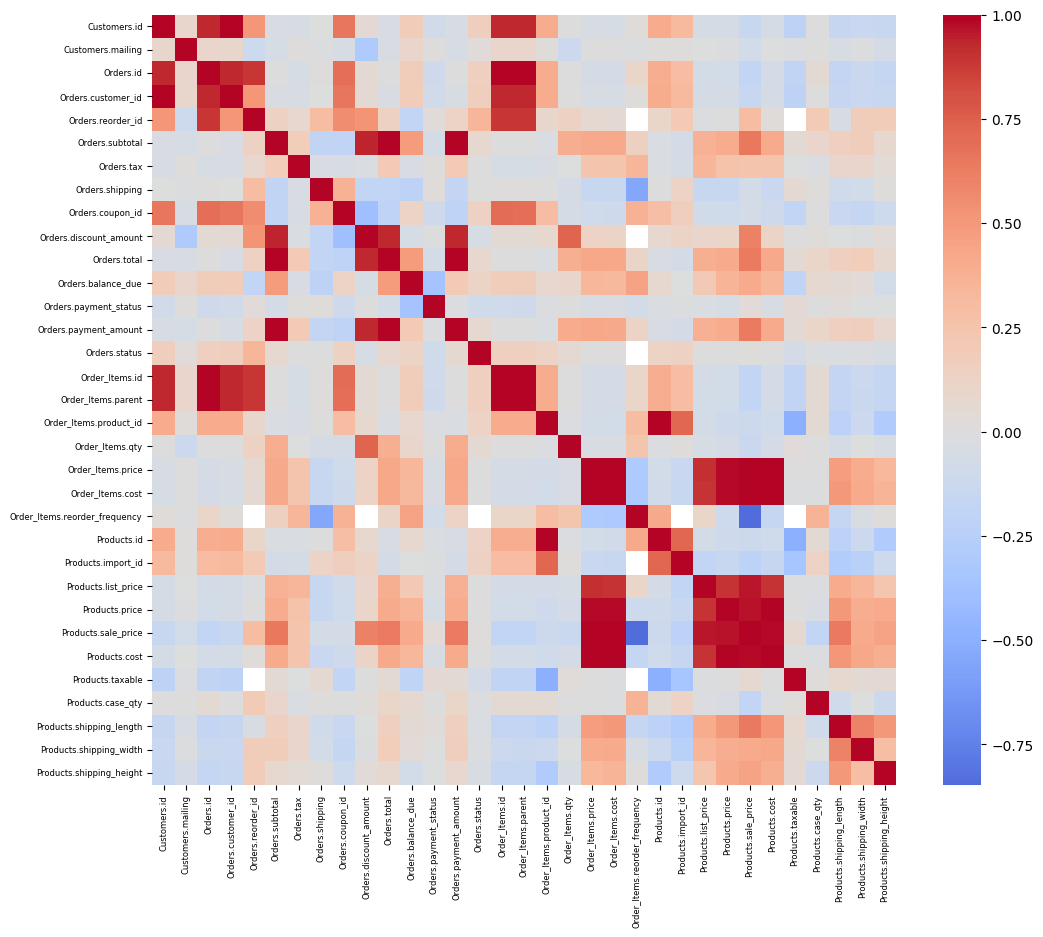

In [22]:
plt.figure(figsize=(12, 10), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.show()

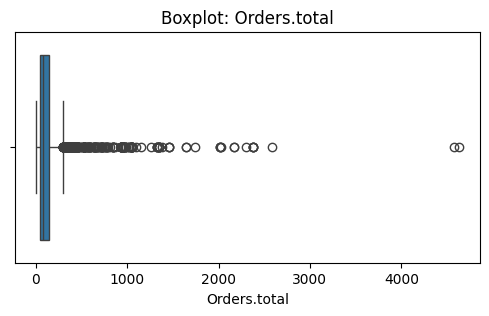

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Orders.total"])
plt.title("Boxplot: Orders.total")
plt.show()

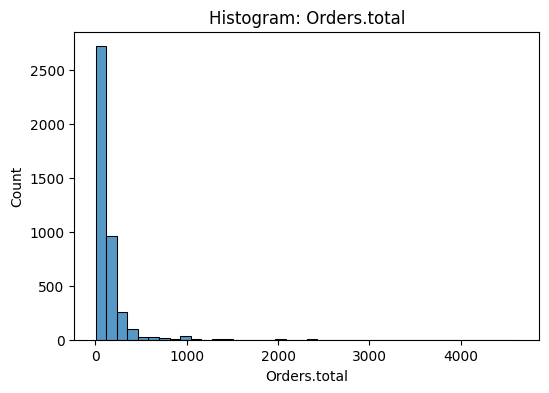

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Orders.total"], bins=40)
plt.title("Histogram: Orders.total")
plt.show()

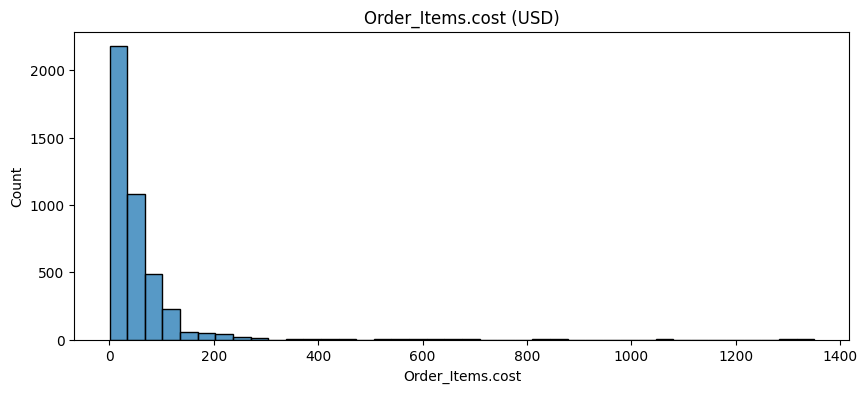

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(df["Order_Items.cost"], bins=40)
plt.title("Order_Items.cost (USD)")
plt.show()

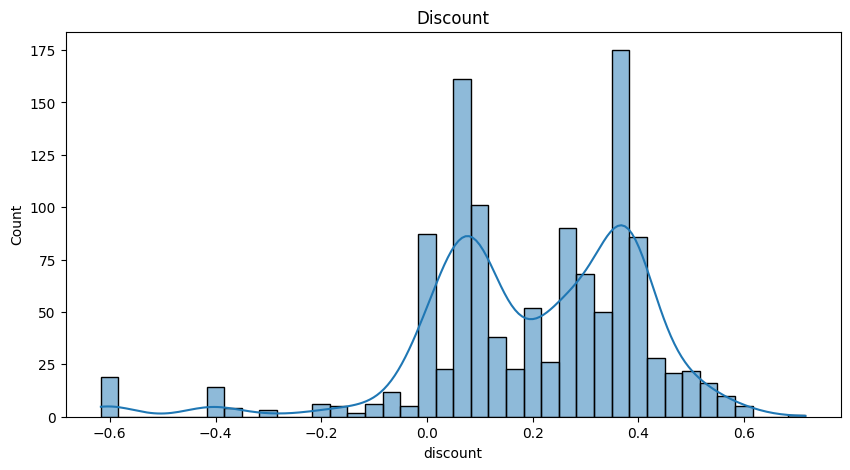

In [26]:
# % розподіл величини знижки
df["discount"] = (df["Products.price"] - df["Products.sale_price"]) / df["Products.price"]

plt.figure(figsize=(10,5))
sns.histplot(df["discount"], bins=40, kde=True)
plt.title("Discount")
plt.show()

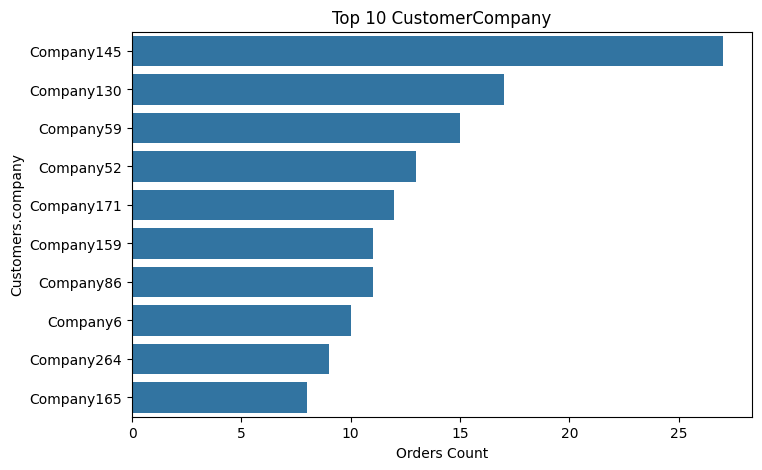

In [27]:
top_company = df["Customers.company"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 CustomerCompany")
plt.xlabel("Orders Count")
plt.show()

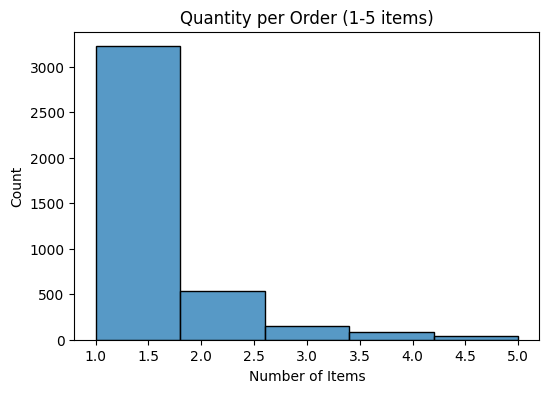

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df[df["Order_Items.qty"] <= 5]["Order_Items.qty"], bins=5)
plt.title("Quantity per Order (1-5 items)")
plt.xlabel("Number of Items")
plt.ylabel("Count")
plt.show()

In [29]:
df_customers = df.filter(like="Customers.")
df_orders = df.filter(like="Orders.")
df_products = df.filter(like="Products.")